In [18]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


In [19]:
caption_data = pd.read_csv('../data/Flickr30K/images/results.csv', sep='|')

In [20]:
caption_data.head()

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .


In [21]:
#Function to tokenize, convert to lower case and remove punctuation
def preprocess_text(text):
    # Check if the input is a string
    if not isinstance(text, str):
        return []

    # Tokenize the text
    tokens = word_tokenize(text)

    # Convert to lowercase
    tokens = [word.lower() for word in tokens]

    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    tokens = [word.translate(table) for word in tokens]

    return tokens



In [22]:
#change the column name 
caption_data.rename(columns={' comment': 'comment'}, inplace=True)

In [23]:
caption_data["clean_captions"] = caption_data["comment"].apply(preprocess_text)

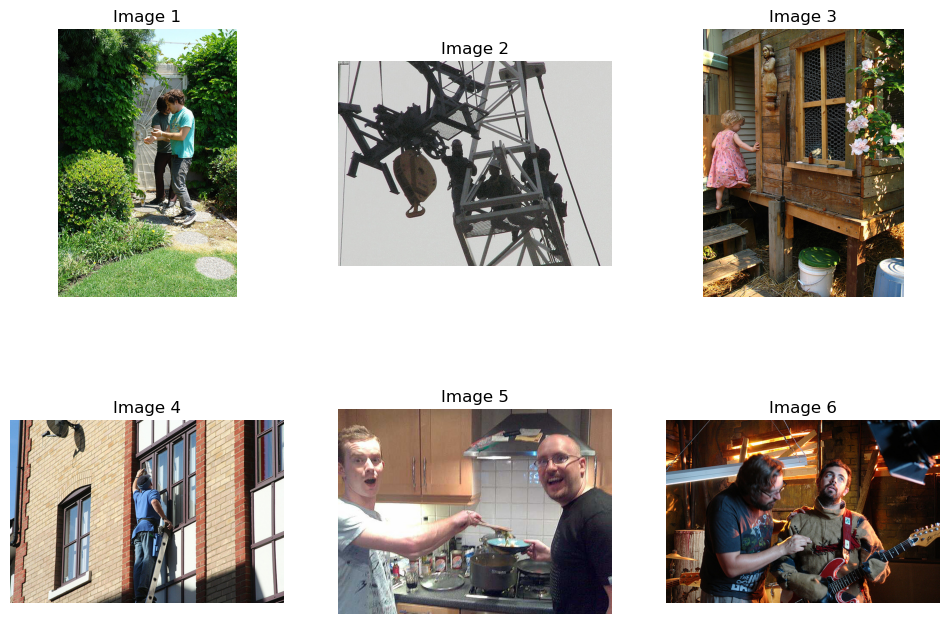

In [24]:
# Define the folder containing the image files
image_folder = '../data/Flickr30K/images'  

# Get unique image names from the DataFrame
unique_image_names = caption_data['image_name'].unique()

# Create a 2x3 grid for displaying the images
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Loop through the first 6 unique image names and display them in the grid
for i, image_name in enumerate(unique_image_names[:6]):
    # Construct the full path to the image file
    image_path = os.path.join(image_folder, image_name)
    
    # Load and display the image
    img = mpimg.imread(image_path)
    axs[i // 3, i % 3].imshow(img)
    axs[i // 3, i % 3].set_title(f'Image {i + 1}')
    axs[i // 3, i % 3].axis('off')

# Adjust spacing and display the grid of images
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()


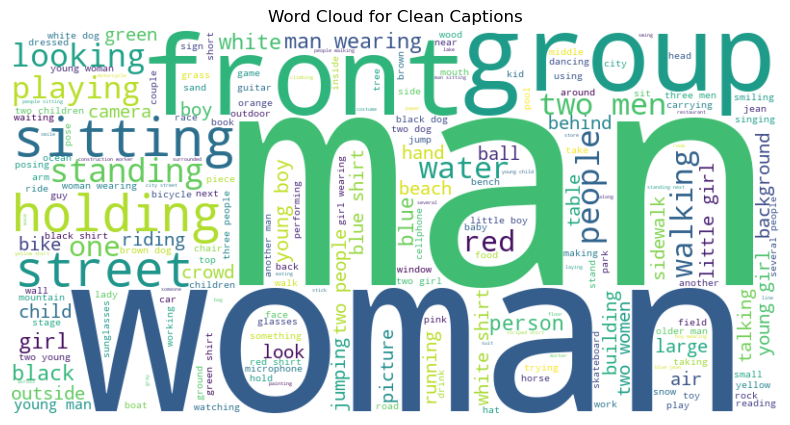

In [25]:

# Combine all clean captions into a single text
all_captions = ' '.join([' '.join(words) for words in caption_data['clean_captions']])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_captions)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Clean Captions')
plt.axis('off')
plt.show()


In [26]:
# Calculate the length of each clean caption in terms of words
caption_data['caption_length_words'] = caption_data['clean_captions'].apply(len)

# Calculate basic statistics for caption lengths
average_caption_length_words = caption_data['caption_length_words'].mean()
maximum_caption_length_words = caption_data['caption_length_words'].max()

# Calculate vocabulary diversity by counting unique words in captions
unique_word_counts = caption_data['clean_captions'].apply(lambda x: len(set(x)))
average_unique_word_count = unique_word_counts.mean()

# Print the calculated statistics
print(f'Average Caption Length (Words): {average_caption_length_words:.2f}')
print(f'Maximum Caption Length (Words): {maximum_caption_length_words}')
print(f'Average Unique Words per Caption: {average_unique_word_count:.2f}')


Average Caption Length (Words): 13.39
Maximum Caption Length (Words): 82
Average Unique Words per Caption: 11.90


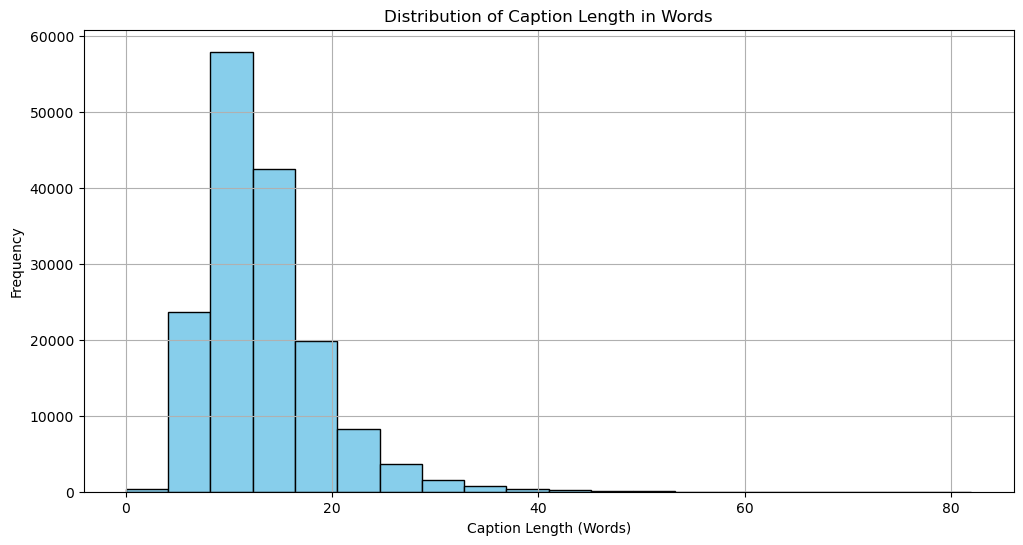

In [27]:

# Plot the distribution of caption lengths in words
plt.figure(figsize=(12, 6))
plt.hist(caption_data['caption_length_words'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Caption Length (Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Caption Length in Words')
plt.grid(True)
plt.show()

/Users/chaitanyashekar/anaconda3/envs/dsan6600/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


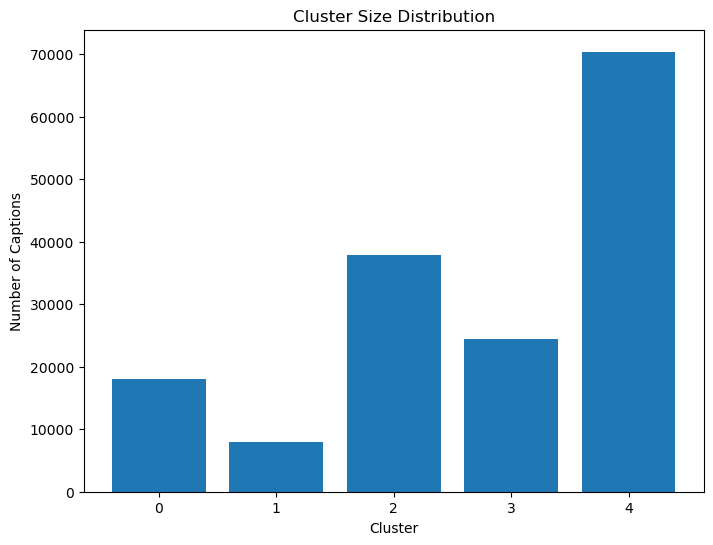

In [28]:

# Convert clean captions into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(words) for words in caption_data['clean_captions']])

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
caption_data['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Calculate the number of captions in each cluster
cluster_counts = caption_data['cluster'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Captions')
plt.title('Cluster Size Distribution')
plt.xticks(cluster_counts.index)
plt.show()


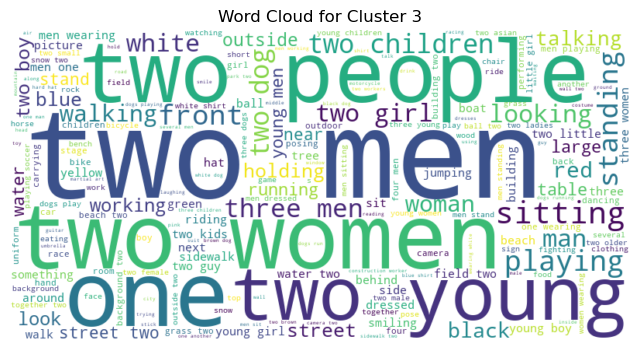

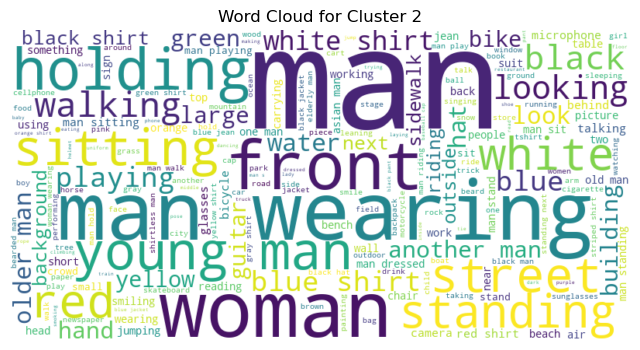

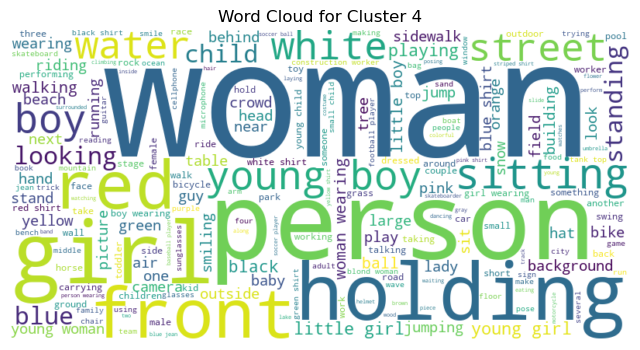

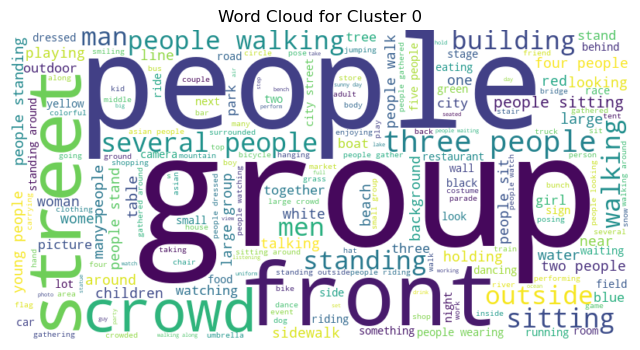

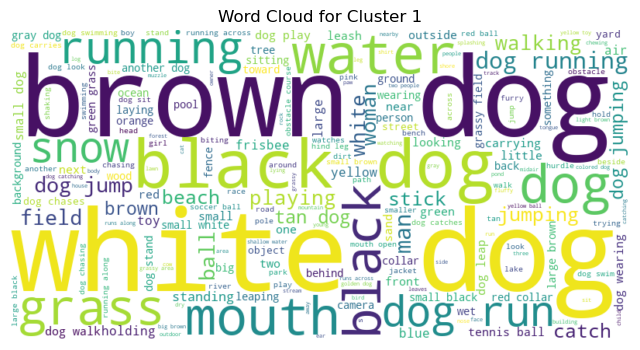

In [29]:

# Generate word clouds for each cluster
for cluster_label in caption_data['cluster'].unique():
    # Filter captions for the current cluster
    cluster_captions = caption_data[caption_data['cluster'] == cluster_label]['clean_captions']
    
    # Combine the filtered captions into a single text for the word cloud
    cluster_text = ' '.join(' '.join(words) for words in cluster_captions)
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    
    # Plot the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster_label}')
    plt.axis("off")
    plt.show()
